In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [21]:
class Autoencoder(tf.keras.models.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(64, 64, 3)),
            tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
            tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu")
        ])
        self.decoder = tf.keras.Sequential([      
            tf.keras.layers.Dense(8*8*256, input_shape=(128,)), 
            tf.keras.layers.Reshape((8, 8, 256)),
            tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'),
            tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'),
            tf.keras.layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [22]:
data = np.load("cats.npy")
train, test = data[0:13000], data[13000:]

In [23]:
train = train / 255.0
test = test / 255.0
mnist_ae = Autoencoder()
mnist_ae.compile(optimizer="adam", loss="mse")
history = mnist_ae.fit(train, train, epochs=7, batch_size=64, shuffle=True, validation_data=(test, test))

Epoch 1/7
204/204 [==============================] - 41s 193ms/step - loss: 0.0434 - val_loss: 0.0232
Epoch 2/7
204/204 [==============================] - 37s 183ms/step - loss: 0.0188 - val_loss: 0.0162
Epoch 3/7
204/204 [==============================] - 38s 185ms/step - loss: 0.0152 - val_loss: 0.0197
Epoch 4/7
204/204 [==============================] - 38s 188ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 5/7
204/204 [==============================] - 38s 187ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 6/7
204/204 [==============================] - 38s 186ms/step - loss: 0.0122 - val_loss: 0.0125
Epoch 7/7
204/204 [==============================] - 39s 190ms/step - loss: 0.0113 - val_loss: 0.0117


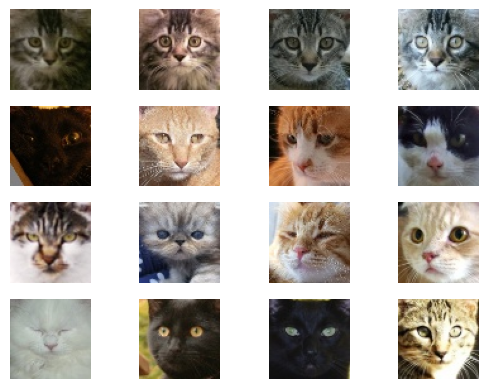

In [24]:
encoded = mnist_ae.encoder(test)
for n in range(16):
    plt.subplot(4, 4, n+1)
    plt.imshow(test[n])
    plt.axis("off")
plt.show()

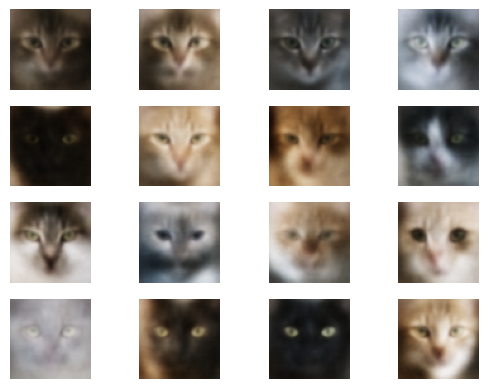

In [25]:
decoded_images = mnist_ae.decoder(encoded)
for n in range(16):
    plt.subplot(4, 4, n+1)
    plt.imshow(decoded_images[n])
    plt.axis("off")
plt.show()

(128,)


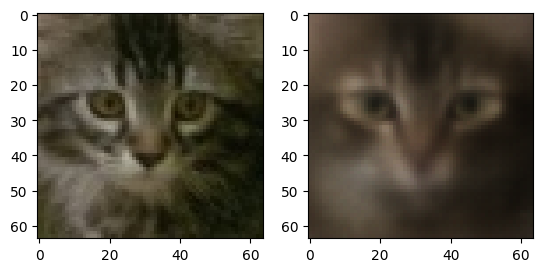

In [27]:
plt.subplot(1, 2, 1)
plt.imshow(test[0])
print(encoded[0].shape)
plt.subplot(1, 2, 2)
plt.imshow(decoded_images[0])

In [28]:
encoder = mnist_ae.encoder
decoder = mnist_ae.decoder
encoder.save("encoder.h5")
decoder.save("decoder.h5")

c:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
